# Question 4: What is the sentiment towards cycling in London?

Tweets scraped from Twitter on 11-Aug-2022.

## Prepare workstation

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Turn off warnings
import warnings
warnings.filterwarnings("ignore")

Rationale for turning off warnings: Warnings usually occur when there are obsolete programming elements. Warnings have been turned off to make the code cleaner. Turning off warnings will still allow warnings to appear

In [3]:
# Install tweepy
!pip install tweepy
import tweepy
from tweepy import OAuthHandler
import time

In [4]:
# Install Twitter API
!pip install twitter

In [5]:
# Import library
from twitter import *

In [6]:
#Create Twitter API variables
consumer_key = "XXX"
consumer_key_secret = "XXX"
access_token = "XXX"
access_token_secret = "XXX"

Note: X's need to be replaced with custom keys and tokens. The code was initially run with individual custom keys and tokens but these were replaced with X's afterward for privacy purposes so that the code could be shared more widely.

In [7]:
# Twitter authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

## Scrape Twitter based on search term 'london uk cycle'

In [8]:
#Create an empty variable
tweets = []

# Define search criteria
def text_query_to_csv(text_query, recent):
    try:
        tweets = tweepy.Cursor(api.search_tweets, q=text_query, tweet_mode="extended").items(recent)
        tweets_list = [[tweet.created_at, tweet.id, tweet.full_text] for tweet in tweets]
        tweets_df = pd.DataFrame(tweets_list,columns=['Datetime', 'Tweet Id', 'Text'])
        tweets_df.to_csv('{}-tweets.csv'.format(text_query), sep=',', index = False)
    except BaseException as e:
        print('failed on_status,',str(e))
        time.sleep(3)

#Define the term of interest and the number of tweets associated with the term to be scraped
text_query = 'london uk cycle -filter:retweets'
recent= 1000000

# Query the relevant tweets and convert the data to a CSV file
text_query_to_csv(text_query, recent)

Search criteria "london uk cycle -filter:retweets' used to limit search to London, UK (when 'london cycle' was used, some search results were referencing London, Ontario). Retweets were filtered to reduce duplicates and to allow the entire tweet to display when exmaining the top 20 positive and negative reviews.

In [9]:
# Convert CSV file to Pandas dataframe
london_cycle_tweets_pd = pd.read_csv("london uk cycle -filter:retweets-tweets.csv")

In [10]:
# Examine first few rows of dataframe
london_cycle_tweets_pd.head()

,Datetime,Tweet Id,Text
0,2022-08-11 16:01:27+00:00,1557759106169323521,@AliceDove7 @Hackneycyclist In the UK there is...
1,2022-08-11 13:19:03+00:00,1557718237735002113,Many of you can’t stand cyclists. I cycle ever...
2,2022-08-11 12:59:18+00:00,1557713267329466368,For anyone attending the @edintfest this summe...
3,2022-08-11 11:35:58+00:00,1557692296577286144,Challenge yourself whilst helping a great caus...
4,2022-08-11 11:33:04+00:00,1557691565124079620,My friend’s husband is doing the London to Bri...


In [11]:
london_cycle_tweets_pd.iloc[2,2]

"For anyone attending the @edintfest this summer don't miss Austrian baritone Florian Boesch and pianist Malcolm Martineau's performance of Schubert's song cycle #Winterreise, charged with forceful intensity and subtle theatricality. https://t.co/FdofVC84uy https://t.co/tvDZoEwOvO"

In [12]:
# Examine shape of dataframe
london_cycle_tweets_pd.shape

(84, 3)

## Clean dataframe

In [13]:
# Extract column containing all the reviews for analysing the text
london_cycle_tweets_pd = pd.DataFrame(london_cycle_tweets_pd['Text'])
london_cycle_tweets_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    84 non-null     object
dtypes: object(1)
memory usage: 800.0+ bytes


In [14]:
# Remove missing values
london_cycle_tweets_pd.dropna(subset=['Text'], inplace=True)
london_cycle_tweets_pd.shape

(84, 1)

In [15]:
# Convert sentences into lowercase
london_cycle_tweets_pd['Text'] = london_cycle_tweets_pd['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
london_cycle_tweets_pd['Text'].head()

0    @alicedove7 @hackneycyclist in the uk there is...
1    many of you can’t stand cyclists. i cycle ever...
2    for anyone attending the @edintfest this summe...
3    challenge yourself whilst helping a great caus...
4    my friend’s husband is doing the london to bri...
Name: Text, dtype: object

In [16]:
# Remove punctuation
london_cycle_tweets_pd['Text'] = london_cycle_tweets_pd['Text'].str.replace('[^\w\s]','', regex=False)
london_cycle_tweets_pd['Text'].head()

0    @alicedove7 @hackneycyclist in the uk there is...
1    many of you can’t stand cyclists. i cycle ever...
2    for anyone attending the @edintfest this summe...
3    challenge yourself whilst helping a great caus...
4    my friend’s husband is doing the london to bri...
Name: Text, dtype: object

In [17]:
# Check the number of duplicate values in the reviewText column
london_cycle_tweets_pd.Text.duplicated().sum()

0

In [18]:
# Drop duplicates
london_cycle_tweets_pdclean = london_cycle_tweets_pd.drop_duplicates(subset=['Text'])

In [19]:
# Reset index and preview cleaned data
london_cycle_tweets_pdclean.reset_index(inplace=True)
london_cycle_tweets_pdclean.head()

,index,Text
0,0,@alicedove7 @hackneycyclist in the uk there is...
1,1,many of you can’t stand cyclists. i cycle ever...
2,2,for anyone attending the @edintfest this summe...
3,3,challenge yourself whilst helping a great caus...
4,4,my friend’s husband is doing the london to bri...


In [20]:
# Examine shape of cleaned data
london_cycle_tweets_pdclean.shape

(84, 2)

## Convert text into tokens

In [21]:
# Import nltk packages for converting text into tokens
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /Users/mhbilas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [22]:
# Apply tokens
london_cycle_tweets_pdclean['tokens'] = london_cycle_tweets_pdclean['Text'].apply(word_tokenize)
london_cycle_tweets_pdclean['tokens'].head()

0    [@, alicedove7, @, hackneycyclist, in, the, uk...
1    [many, of, you, can, ’, t, stand, cyclists, .,...
2    [for, anyone, attending, the, @, edintfest, th...
3    [challenge, yourself, whilst, helping, a, grea...
4    [my, friend, ’, s, husband, is, doing, the, lo...
Name: tokens, dtype: object

In [23]:
# Combine tokens into one list
all_tokens = []
for i in range(london_cycle_tweets_pdclean.shape[0]):
    all_tokens = all_tokens + london_cycle_tweets_pdclean['tokens'][i]

In [24]:
# Filter out tokens that are neither alphabets or numbers (to eliminate punctuation marks etc)
tokens1 = [word for word in all_tokens if word.isalnum()]

## Eliminate stopwords

In [25]:
# Download the nltk resource, import the method, and extract stopwords in the English language.
nltk.download ('stopwords')
from nltk.corpus import stopwords
english_stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mhbilas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
# Create a list of tokens from the list of identified tokens after eliminating stopwords
tokens2 = [x for x in tokens1 if x.lower() not in english_stopwords]

In [27]:
# Create empty list to store values from list of identified tokens after eliminating stopwords
tokens2_string = ''
for value in tokens2:
    tokens2_string = tokens2_string + value + ' '

## Plot wordcloud

In [28]:
# Import WordCloud
!pip install wordcloud
from wordcloud import WordCloud

In [29]:
# Set parameters for wordcloud image
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens2_string)

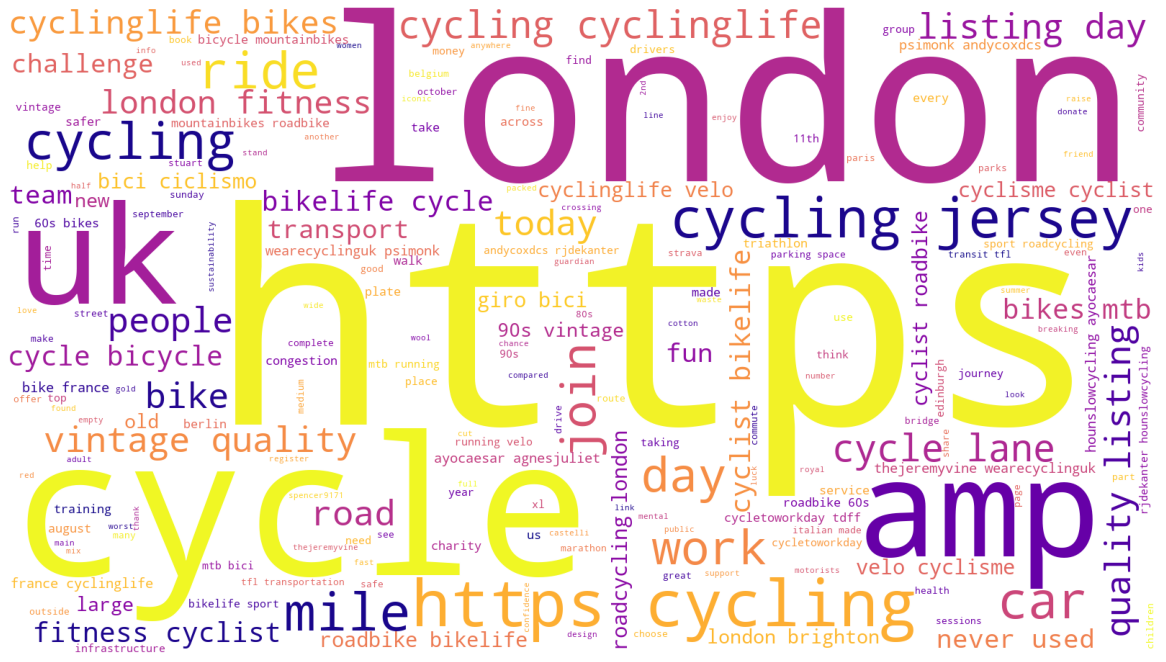

In [30]:
# Plot the WordCloud image                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

Note: "rt" stands for retweet and "b" is added when we specify that we want to include the full extended tweet. "https" adds no value to the analysis - therefore, we will exclude these terms from the analysis.

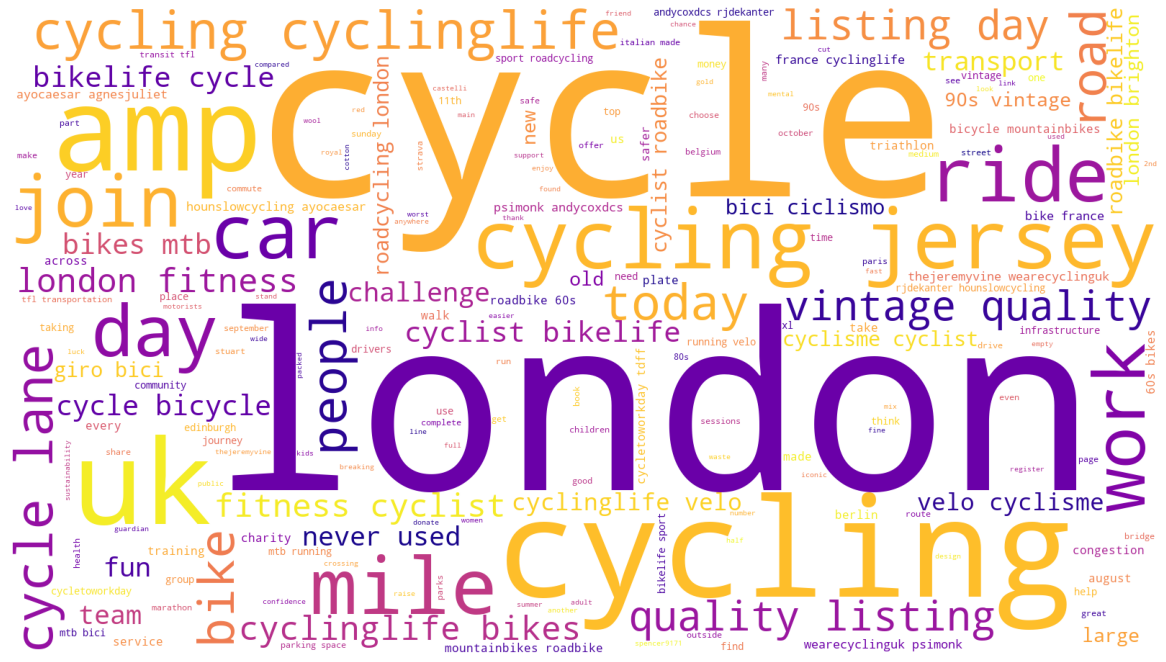

In [31]:
# Re-generate wordcloud with https and rt removed
all_text = " ".join(rev for rev in tokens2)
stop_words = ["https", "rt", "b"]

# Set paramters for image
wordcloud = WordCloud(stopwords=stop_words,width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(all_text)

# Plot wordcloud image
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.show()

## Generate top 15 words that appear most often

In [32]:
# View the frequency distribution
from nltk.probability import FreqDist
fdist1 = FreqDist(tokens2)
fdist1

FreqDist({'https': 110, 'london': 73, 'cycle': 71, 'cycling': 48, 'bikes': 21, 'uk': 19, 'amp': 19, 'cyclist': 19, 'vintage': 18, 'day': 17, ...})

In [33]:
# Remove 'https' from list of tokens
remove_words = ["https", "rt", "b"]
tokens_new_list = [x for x in tokens2 if x not in remove_words]

# Compare length of tokens2 vs tokens_new_list to see if https and rt was removed
print(len(tokens2))
print(len(tokens_new_list))

2044
1934


In [34]:
# Generate frequency distribution with 'https' and 'rt' removed
fdist2 = FreqDist(tokens_new_list)
fdist2

FreqDist({'london': 73, 'cycle': 71, 'cycling': 48, 'bikes': 21, 'uk': 19, 'amp': 19, 'cyclist': 19, 'vintage': 18, 'day': 17, 'bikelife': 17, ...})

In [35]:
# Generate top 15 commonly used words

# Import counter
from collections import Counter

# Generate dataframe out of counter
counts = pd.DataFrame(Counter(tokens_new_list).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')
counts

,Frequency
Word,
london,73
cycle,71
cycling,48
bikes,21
uk,19
amp,19
cyclist,19
vintage,18
day,17


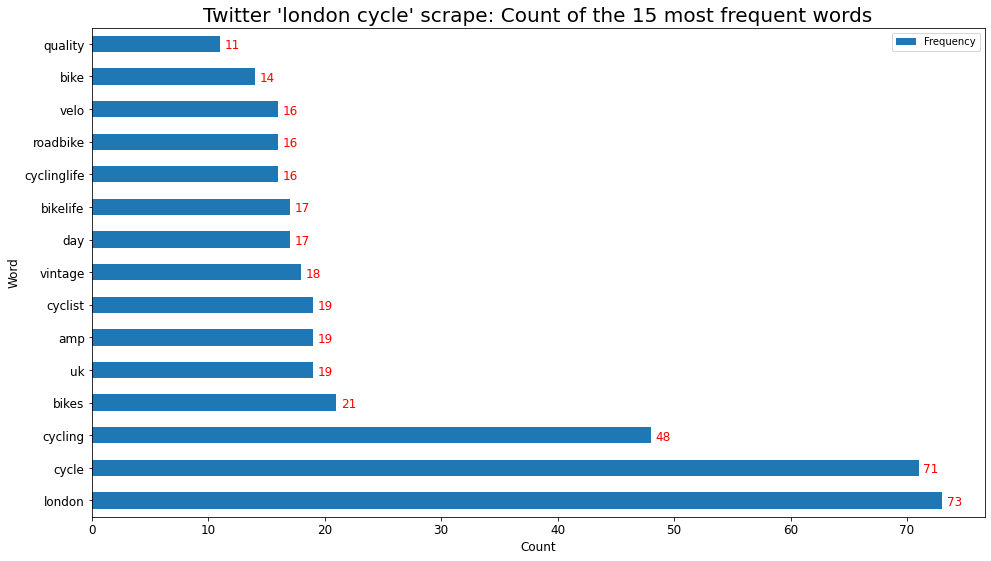

In [36]:
# Generate bar graph with frequencies
ax = counts.plot(kind='barh', fontsize=12, figsize=(16,9))
ax.set_xlabel("Count", fontsize=12)
ax.set_ylabel("Word", fontsize=12)
ax.set_title("Twitter 'london cycle' scrape: Count of the 15 most frequent words", fontsize=20)

# Add annotations
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)), fontsize=12, color="red")

## Generate polarity score

In [37]:
# Install TextBlob
!pip install textblob

# Import
from textblob import TextBlob

In [38]:
# Define a function to extract a polarity score for a tweet
def generate_polarity(tweet):
    return TextBlob(tweet).sentiment[0]

In [39]:
# Populate a new column with polarity score for each tweet
london_cycle_tweets_pdclean['polarity'] = london_cycle_tweets_pdclean['Text'].apply(generate_polarity)

In [40]:
# Preview the results
london_cycle_tweets_pdclean['polarity'].head()

0   -0.300000
1    0.123106
2   -0.333333
3    0.204167
4   -0.187500
Name: polarity, dtype: float64

## Visualise sentiment polarity scores


### Histogram

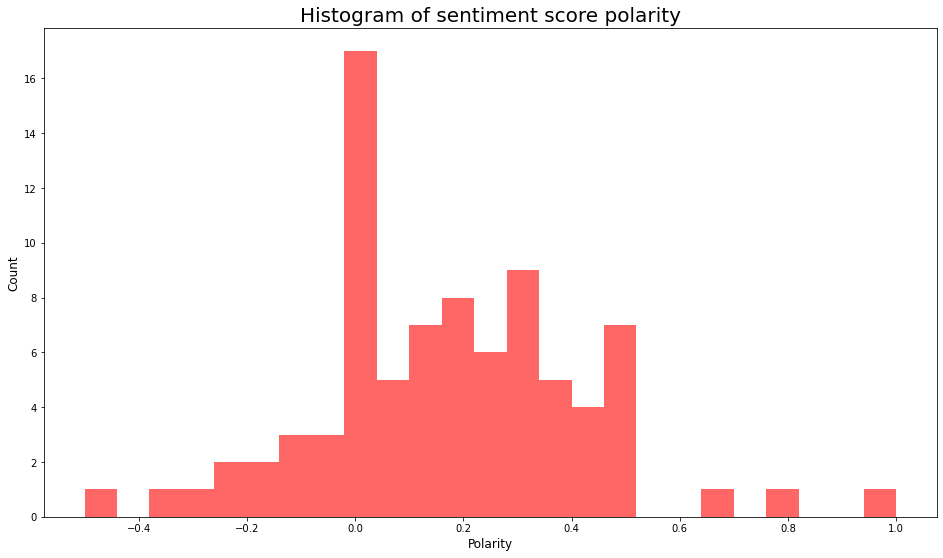

In [41]:
# Set the number of bins
num_bins = 25

# Set the plot area
plt.figure(figsize=(16,9))

# Define the number of bins
n, bins, patches = plt.hist(london_cycle_tweets_pdclean['polarity'], \
                            num_bins, facecolor='red', alpha=0.6)
# Set the labels
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity', fontsize=20)

plt.show()

### Boxplot

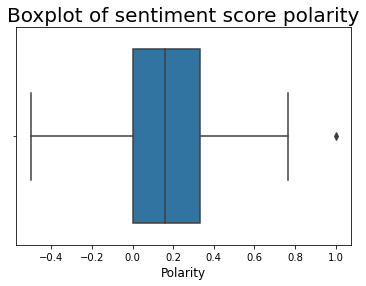

In [42]:
# Define type of plot
sns.boxplot(x='polarity', data=london_cycle_tweets_pdclean)

# Set the labels
plt.xlabel('Polarity', fontsize=12)
plt.title('Boxplot of sentiment score polarity', fontsize=20)

plt.show()

## Extract top 20 positive and negative tweets

### Top 20 positive tweets

In [43]:
# Create dataframe to store top 20 tweets
positive_sentiment = london_cycle_tweets_pdclean.nlargest(20, 'polarity')
positive_sentiment

,index,Text,tokens,polarity
66,66,"it’s #cycletoworkday, marking 10 years of the ...","[it, ’, s, #, cycletoworkday, ,, marking, 10, ...",1.000000
73,73,happy 10th birthday to cycle to work day! our ...,"[happy, 10th, birthday, to, cycle, to, work, d...",0.766667
72,72,#cycletoworkday is celebrating its 10th birthd...,"[#, cycletoworkday, is, celebrating, its, 10th...",0.650000
17,17,"""i hadn’t anticipated the power of a group of ...","[``, i, hadn, ’, t, anticipated, the, power, o...",0.500000
20,20,cycle response unit shortlisted for top award ...,"[cycle, response, unit, shortlisted, for, top,...",0.500000
44,44,add your voice to our work to ensure everyone ...,"[add, your, voice, to, our, work, to, ensure, ...",0.500000
45,45,🔧 city &amp; guilds - level 1 cycle mechanics ...,"[🔧, city, &, amp, ;, guilds, -, level, 1, cycl...",0.500000
62,62,some more just up #cycling jerseys see them on...,"[some, more, just, up, #, cycling, jerseys, se...",0.500000
13,13,set yourself a challenge to run and fundraise ...,"[set, yourself, a, challenge, to, run, and, fu...",0.493750
16,16,do you enjoy cycling? or perhaps you love a ch...,"[do, you, enjoy, cycling, ?, or, perhaps, you,...",0.468750


In [44]:
# Only retain neccessary columns
positive_sentiment = positive_sentiment[['Text', 'polarity']].reset_index(drop=True)

In [45]:
# Adjust column width
positive_sentiment.style.set_properties(subset=['Text'], **{'width': '1200px'})

,Text,polarity
0,"it’s #cycletoworkday, marking 10 years of the uk’s biggest #cycle commuting event. https://t.co/ilipis5fe1 is perfectly positioned to take advantage of the infrastructure investment that has been made to encourage #cycling in london, with the cycle superhighway on our doorstep. https://t.co/zr2vvfrhfr",1.000000
1,happy 10th birthday to cycle to work day! our partnership with @cycleschemeltd is just one of the range of employee benefits we offer - great to see employees in our london office taking part 🚲 find out more: https://t.co/zvvrhyq2b2 #london #careers #cycletoworkday https://t.co/duywtfwyzn,0.766667
2,"#cycletoworkday is celebrating its 10th birthday today! jon, engagement and community communications manager shares why he loves cycling to work and around london. it’s great for your health and environment. ❤️🚲🌳 find out more: https://t.co/zehwmcqcwl 🚴🏽‍♀️ 🚴🏿 🚴🏾‍♂️ https://t.co/0skh8lthhy",0.650000
3,"""i hadn’t anticipated the power of a group of women on bikes. so many of the women hadn’t ridden since childhood, or even learnt to ride, so seeing them on the bikes, their confidence and their smiles was contagious and inspiring"" @tfl @london_cycling https://t.co/1elsxls9xu",0.500000
4,cycle response unit shortlisted for top award in sustainability - london ambulance service #london #transit #tfl #transportation https://t.co/lxem6vuyak,0.500000
5,add your voice to our work to ensure everyone can cycle safely in london - join as a member today https://t.co/ogtldqziqm https://t.co/pzwhhuga27,0.500000
6,🔧 city & guilds - level 1 cycle mechanics learn how to look after your bike confidently with expert teaching: book via our website (£400pp) https://t.co/dyz2jwobx1 @cityandguilds @leevalleyvp * * * #cyclemechanics #london #cycling #bikerepair #bikeclinic #bigbikerevival https://t.co/kflpyrlawn,0.500000
7,some more just up #cycling jerseys see them on my page https://t.co/ubzhua8dp3 535 up now more tonight #cycling #bike #france #cyclinglife #velo #cyclisme #cyclist #roadbike #bikelife #sport #roadcycling #london #cycle #strava #triathlon #tdff #training #giro #bici #ciclismo https://t.co/itsktfdljg,0.500000
8,set yourself a challenge to run and fundraise for the royal parks charity through the world’s most famous marathon! 🏃🏻 🎽 we have just two charity places left in the @londonmarathon. sign-up below to help protect london’s eight beautiful parks 🔽 https://t.co/whlvv73shr,0.493750
9,do you enjoy cycling? or perhaps you love a challenge? support @givingtogeorges £5million children's appeal and join team george's for an iconic 55 mile bike ride from london to brighton on sunday 11th september! full info: https://t.co/3edgkq3bia #balham https://t.co/nii1u9qofu,0.468750


In [46]:
positive_sentiment.iloc[0,0]

'it’s #cycletoworkday, marking 10 years of the uk’s biggest #cycle commuting event. https://t.co/ilipis5fe1 is perfectly positioned to take advantage of the infrastructure investment that has been made to encourage #cycling in london, with the cycle superhighway on our doorstep. https://t.co/zr2vvfrhfr'

### Top 20 negative tweets

In [47]:
# Create dataframe to store top 20 tweets
negative_sentiment = london_cycle_tweets_pdclean.nsmallest(20, 'polarity')

In [48]:
# Only retain neccessary columns
negative_sentiment = negative_sentiment[['Text', 'polarity']].reset_index(drop=True)

In [49]:
# Adjust column width
negative_sentiment.style.set_properties(subset=['Text'], **{'width': '1200px'})

,Text,polarity
0,a cyclist’s gopro has shown just how terrifying it can be to cycle through central london. https://t.co/inpz8xdul6,-0.500000
1,"for anyone attending the @edintfest this summer don't miss austrian baritone florian boesch and pianist malcolm martineau's performance of schubert's song cycle #winterreise, charged with forceful intensity and subtle theatricality. https://t.co/fdofvc84uy https://t.co/tvdzoewovo",-0.333333
2,"@alicedove7 @hackneycyclist in the uk there is no congestion caused by cycle lanes. every day london is a sea of red on google maps, and the worst roads aren't anywhere near any cycle lanes. https://t.co/dd2uwn0fx0",-0.300000
3,"@andrewjsutton @thejeremyvine @wearecyclinguk @london_cycling @psimonk @andycoxdcs @updates_cycle @rjdekanter @hounslowcycling @ayocaesar @agnesjuliet @bbc_topgear no - diplomatic plates are ""xxx y xxx"" format. that plate is odd, being in ""uk"" font, but not a uk registration - plates from bahrain & qatar are just 6 figures, so maybe it's from there (but 'hidden'?) the red car in front - totally illegal plate!",-0.239583
4,the citysprint cycle team are battling the 55-mile cycle from london to brighton for @trusselltrust in less than 2 months! jason sharman and mark philipson are 2/13 of the team that are coming together to tackle this challenge. head to the justgiving page https://t.co/zfxjqxhl9f https://t.co/y5xn3qmabn,-0.208333
5,"my friend’s husband is doing the london to brighton cycle ride (55 miles) to raise money for #endometriosis uk. please share & donate if you can, every little helps. thank you https://t.co/d0zhusfdqa @pretty_inpain @endit_mendit @studentparamum @bondsendo @dionnemcfx",-0.187500
6,@scienceofsport @pwaino this reminded me of the 2012 olympics when dave brailsford joked about team gb having “specially round wheels” & the french taking him seriously https://t.co/j2f2q1c7wh,-0.177778
7,"@london_cycles ah, ""the cycle lane that's always empty"".",-0.100000
8,"a mental health charity volunteer who has battled ""crippling"" #depression is taking on a mammoth cycle challenge. darren atwood will ride 145 miles from london to melton mowbray on 24 august in support of unlock your you. https://t.co/n57ylvswxk",-0.100000
9,protected wide cycle lanes infrastructure countrywide urgently required london mayor urged to halt silvertown tunnel scheme at 11th hour | london | the guardian https://t.co/mzp6h56eoc,-0.100000
